# 3 Components Data

In [2]:
import numpy as np
import time

from ml4pd import components
import dist_utils
from ml4pd.aspen_units import Distillation
from ml4pd.streams import MaterialStream

input_molecules = dist_utils.get_mol_labels()
components.set_components(input_molecules['name'].to_list())

raw_data = dist_utils.get_benchmark_data(comp=3, dates='220520')
data = dist_utils.add_name_columns(raw_data, input_molecules[['name', 'mol']])
data = dist_utils.add_flow_perc(data)
data = dist_utils.rename_flowrate_columns(data)

## Benchmark Data Info

In [3]:
input_molecules.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
name,acetone,2-butanone,3-pentanone,3-hexanone,4-heptanone,4-octanone,5-nonanone,5-decanone,6-undecanone,6-dodecanone,6-tridecanone,7-tetradecanone,8-pentadecanone,water
mol,C3-ONE,C4-ONE,C5-ONE,C6-ONE,C7-ONE,C8-ONE,C9-ONE,C10-ONE,C11-ONE,C12-ONE,C13-ONE,C14-ONE,C15-ONE,H2O
smiles,CC(=O)C,CCC(=O)C,CCC(=O)CC,CCCC(=O)CC,CCCC(=O)CCC,CCCCC(=O)CCC,CCCCC(=O)CCCC,CCCCCC(=O)CCCC,CCCCCC(=O)CCCCC,CCCCCCC(=O)CCCCC,CCCCCCCC(=O)CCCCC,CCCCCCCC(=O)CCCCCC,CCCCCCCC(=O)CCCCCCC,O


In [4]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
temp_dist,12096.0,190.849120,101.579671,1.589174e+01,1.123273e+02,172.803162,263.550527,416.603500
temp_bott,12096.0,214.908201,101.659791,3.521194e+01,1.337667e+02,196.732403,290.248983,434.794647
temp_feed,12096.0,202.916131,100.331884,3.517856e+01,1.246547e+02,186.038635,276.903909,416.534837
duty_condensor,12096.0,-43006.023505,91269.101137,-4.961898e+05,-3.402247e+04,-14337.635300,-870.295447,-0.031283
duty_reboiler,12096.0,42892.224124,91875.576269,-7.060835e-01,7.637737e+02,14249.645500,34407.838675,497114.572000
flowrate_bott_A,12096.0,0.065716,0.077360,0.000000e+00,1.792839e-08,0.038984,0.126891,0.256620
flowrate_bott_B,12096.0,0.237842,0.181067,0.000000e+00,6.484256e-04,0.261879,0.404521,0.473678
flowrate_bott_C,12096.0,0.312911,0.160322,3.554722e-06,1.374662e-01,0.386805,0.424657,0.482577
flowrate_feed_A,12096.0,0.147181,0.069994,5.263158e-02,7.142857e-02,0.150685,0.200000,0.257143
flowrate_feed_B,12096.0,0.426410,0.034997,3.714286e-01,4.000000e-01,0.424658,0.464286,0.473684


## Time Benchmark

In [5]:
times = []
for i in range(0, 10):
    start_time = time.time()
    feed_stream = MaterialStream(stream_type="feed")(
        vapor_fraction=data['vapor_fraction'].to_list(),
        pressure=data['feed_pressure'].to_list(),
        molecules=dist_utils.get_name_columns(data).to_dict('list'),
        flowrates=dist_utils.get_flowrate_columns(data).to_dict('list'),
    )
    
    dist_col = Distillation(
        no_stages = data['no_stages'].to_list(),
        feed_stage =  data['feed_stage'].to_list(),
        pressure = data['pressure_atm'].to_list(),
        reflux_ratio = data['ratio_reflux'].to_list(),
        boilup_ratio = data['ratio_boilup'].to_list(),
        verbose=False
    )

    bott_stream, dist_stream = dist_col(feed_stream)
    
    times.append(time.time() - start_time)

ordered_data = dist_utils.sort_targets_by_weight(data, feed_stream._mw_idx)

average = np.mean(times).round(2)
std = np.std(times).round(2)

print(f"{len(data)} data pts take {average} +/- {std} seconds to predict.")

12096 data pts take 3.22 +/- 0.37 seconds to predict.


## Classifier Benchmark

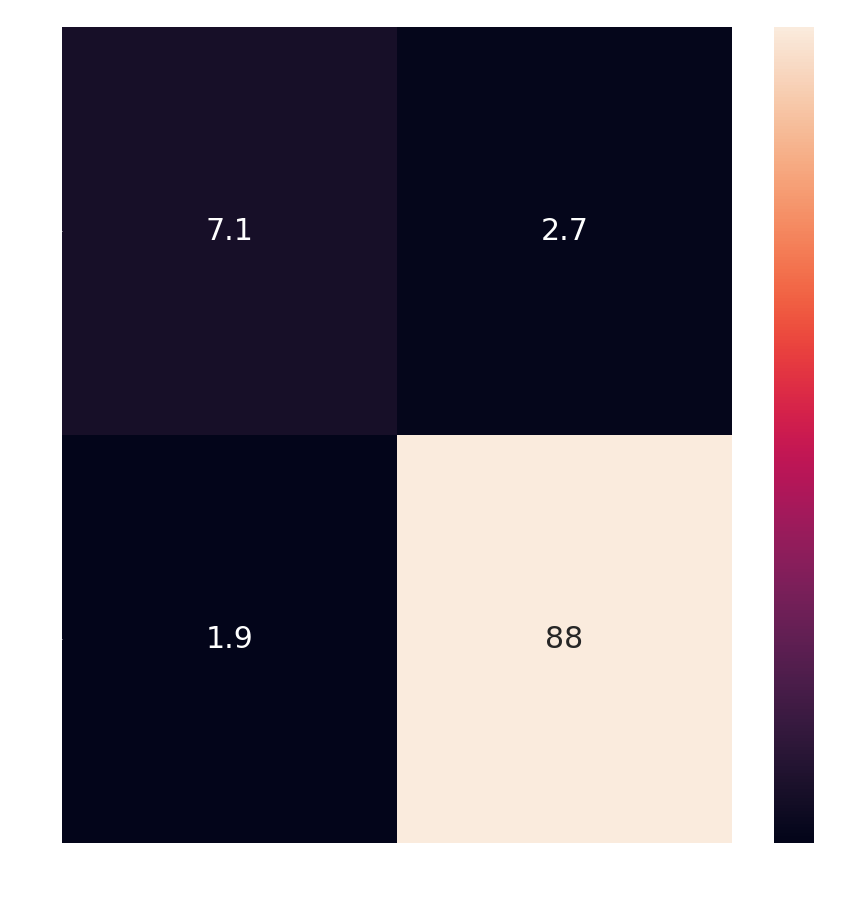

0.9748175182481752

In [6]:
ok_idx = np.array(ordered_data[ordered_data['Status'] == 'OK'].index)
dist_utils.plot_confusion_matrix(ordered_data, dist_col.status)

## Flowrates Benchmark

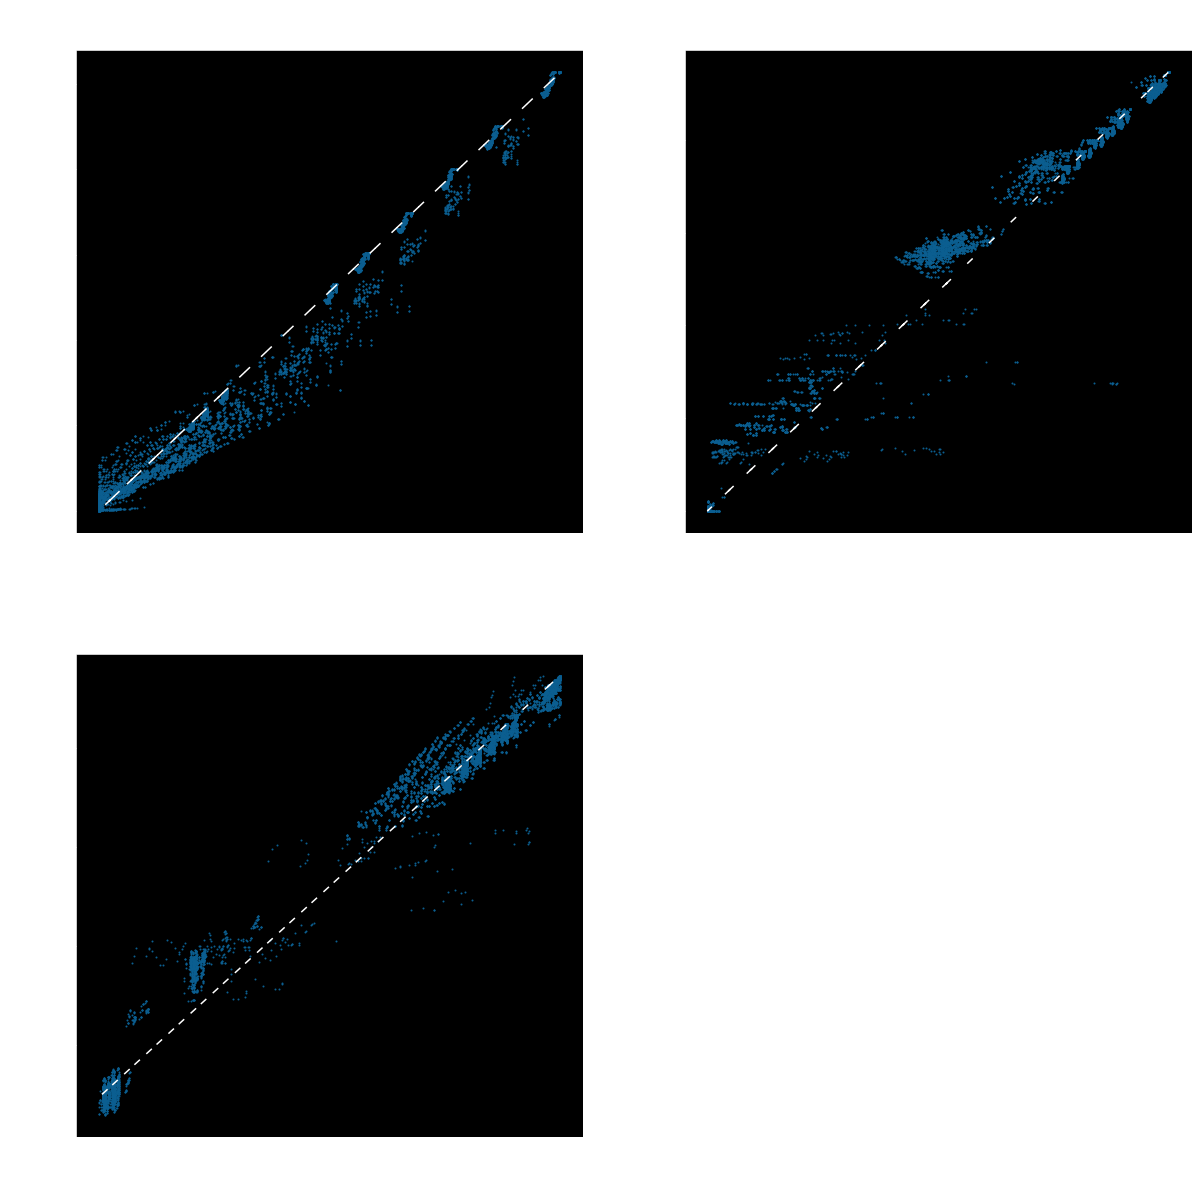

In [ ]:
dist_utils.plot_flow(
    y_true=ordered_data.loc[ok_idx],
    y_pred=bott_stream.flow.loc[ok_idx]
)

## Duty Benchmark

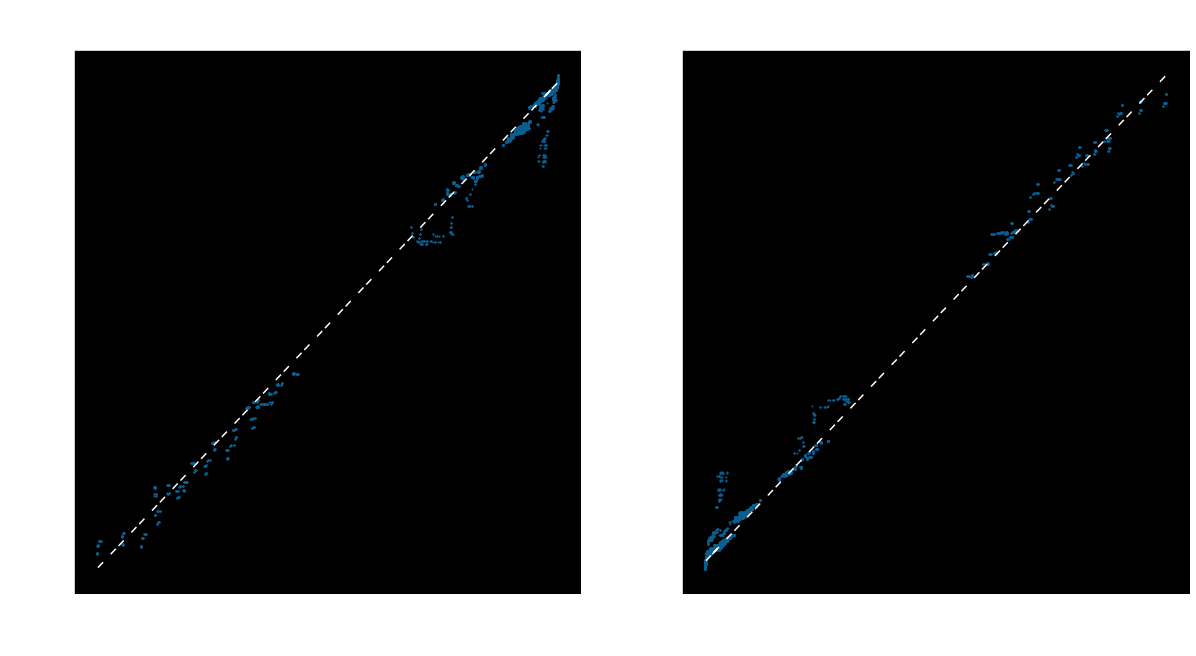

In [ ]:
dist_utils.plot_duty(ordered_data, dist_col, ok_idx)

## Temperature Benchmark

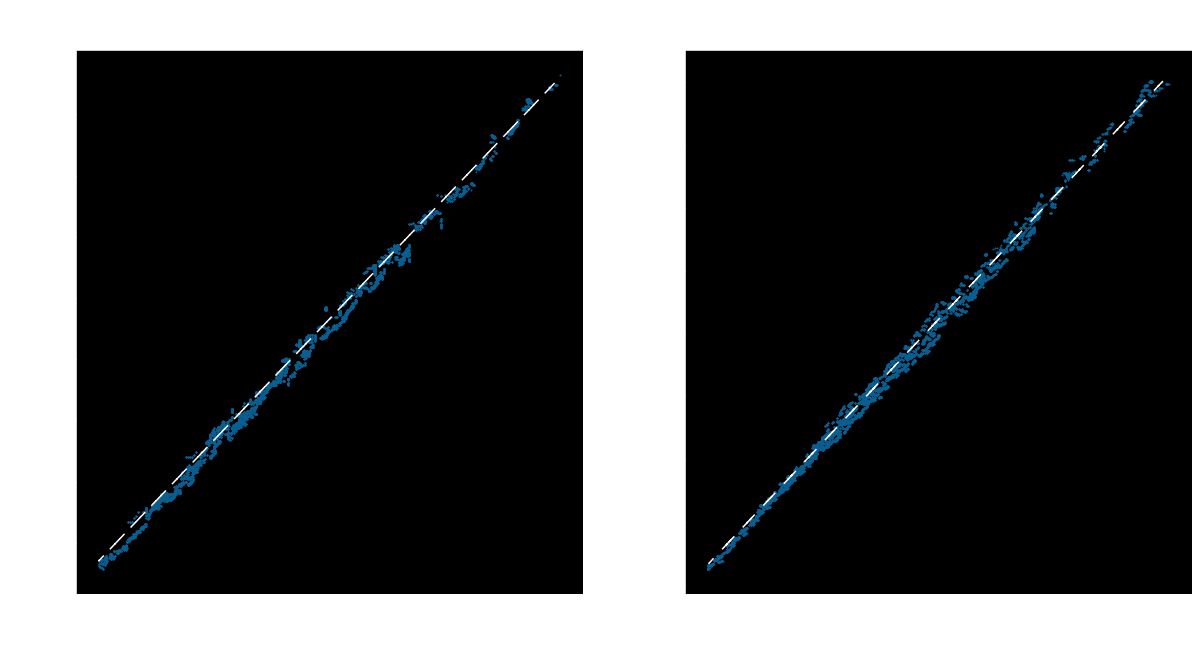

In [ ]:
dist_utils.plot_temp(ordered_data, bott_stream, dist_stream, ok_idx)

## Mean Absolute Errors

In [ ]:
dist_utils.evaluate_flow(
    ordered_data.loc[ok_idx], 
    bott_stream.flow.loc[ok_idx], 
    metric='mae'
)

,flowrate_bott_A,flowrate_bott_B,flowrate_bott_C,mean
0,0.006074,0.015565,0.012195,0.011278


In [ ]:
dist_utils.evaluate_duty(
    ordered_data, 
    dist_col, 
    ok_idx, 
    metric='mae'
)

,condensor_duty,reboiler_duty,mean
0,4107.908326,4144.421101,4126.164713


In [ ]:
dist_utils.evaluate_temp(
    ordered_data, 
    bott_stream, 
    dist_stream, 
    ok_idx, 
    metric='mae'
)

,bott_temp,dist_temp,mean
0,6.339481,4.837448,5.588465
